In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [5]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values


In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [8]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 0, max_depth = 2 )

model.fit(X,y)


DecisionTreeRegressor(max_depth=2, random_state=0)

In [9]:
from sklearn.tree import export_text

text_repo = export_text(model)
print(text_repo)

|--- feature_0 <= 8.50
|   |--- feature_0 <= 6.50
|   |   |--- value: [82500.00]
|   |--- feature_0 >  6.50
|   |   |--- value: [250000.00]
|--- feature_0 >  8.50
|   |--- feature_0 <= 9.50
|   |   |--- value: [500000.00]
|   |--- feature_0 >  9.50
|   |   |--- value: [1000000.00]



[Text(0.5, 0.8333333333333334, 'Position <= 8.5\nsquared_error = 80662250000.0\nsamples = 10\nvalue = 249500.0'), Text(0.25, 0.5, 'Position <= 6.5\nsquared_error = 6921484375.0\nsamples = 8\nvalue = 124375.0'), Text(0.125, 0.16666666666666666, 'squared_error = 1381250000.0\nsamples = 6\nvalue = 82500.0'), Text(0.375, 0.16666666666666666, 'squared_error = 2500000000.0\nsamples = 2\nvalue = 250000.0'), Text(0.75, 0.5, 'Position <= 9.5\nsquared_error = 62500000000.0\nsamples = 2\nvalue = 750000.0'), Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 500000.0'), Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1000000.0')]


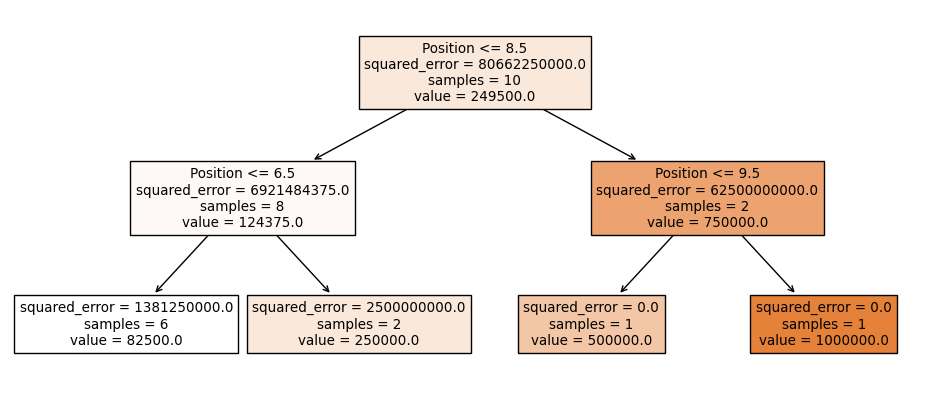

In [22]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(12,5),dpi=100)

visualization = plot_tree(model,feature_names = df.columns , filled = True)

print(visualization)

In [12]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [25]:
df

Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

In [30]:
model.predict([[10]])

array([1000000.])

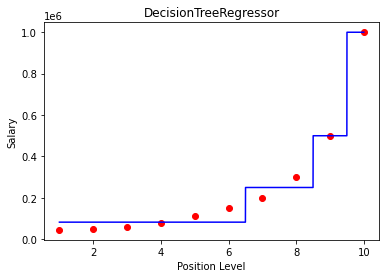

In [37]:
x_grid = np.arange(min(X),max(X),0.01)
x_grid = x_grid.reshape(len(x_grid),1)

plt.scatter (X,y , color = "red")

plt.plot(x_grid,model.predict(x_grid) , color = "blue")

plt.title("DecisionTreeRegressor")

plt.xlabel("Position Level")

plt.ylabel("Salary")

plt.show()

In [43]:
df = pd.read_csv("Carseats.csv")

In [47]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [49]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [51]:
df["ShelveLoc"].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [52]:
df["ShelveLoc"] = df["ShelveLoc"].map({'Bad':1, 'Good':2, 'Medium':3})

In [54]:
df["Urban"] = df["Urban"].map({'Yes':1, 'No':2})

In [55]:
df["US"] = df["US"].map({'Yes':1, 'No':2})

In [56]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          1   42   
1  11.22        111      48           16         260     83          2   65   
2  10.06        113      35           10         269     80          3   59   
3   7.40        117     100            4         466     97          3   55   
4   4.15        141      64            3         340    128          1   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   2

In [58]:
X = df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]

In [60]:
y = df["Price"]

In [66]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 0, max_depth = 10 )

model.fit(X,y)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [71]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [73]:
from sklearn.tree import export_text
columns = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
text_repo = export_text(model,feature_names =columns )
print(text_repo)

|--- CompPrice <= 120.50
|   |--- Sales <= 7.55
|   |   |--- CompPrice <= 109.50
|   |   |   |--- ShelveLoc <= 1.50
|   |   |   |   |--- Age <= 47.00
|   |   |   |   |   |--- Population <= 310.00
|   |   |   |   |   |   |--- value: [72.00]
|   |   |   |   |   |--- Population >  310.00
|   |   |   |   |   |   |--- value: [82.00]
|   |   |   |   |--- Age >  47.00
|   |   |   |   |   |--- Urban <= 1.50
|   |   |   |   |   |   |--- Age <= 60.50
|   |   |   |   |   |   |   |--- Sales <= 3.71
|   |   |   |   |   |   |   |   |--- value: [97.00]
|   |   |   |   |   |   |   |--- Sales >  3.71
|   |   |   |   |   |   |   |   |--- Sales <= 5.18
|   |   |   |   |   |   |   |   |   |--- value: [94.00]
|   |   |   |   |   |   |   |   |--- Sales >  5.18
|   |   |   |   |   |   |   |   |   |--- value: [95.00]
|   |   |   |   |   |   |--- Age >  60.50
|   |   |   |   |   |   |   |--- Advertising <= 1.00
|   |   |   |   |   |   |   |   |--- value: [117.00]
|   |   |   |   |   |   |   |--- Advertising > 

In [70]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(300,100),dpi=100)

visualization = plot_tree(model,feature_names = df.columns , filled = True)

print(visualization)

[Text(0.4766798048048048, 0.9545454545454546, 'CompPrice <= 120.5\nsquared_error = 559.183\nsamples = 400\nvalue = 115.795'), Text(0.22060341591591592, 0.8636363636363636, 'Sales <= 7.55\nsquared_error = 441.248\nsamples = 146\nvalue = 101.548'), Text(0.10993806306306306, 0.7727272727272727, 'CompPrice <= 109.5\nsquared_error = 245.53\nsamples = 78\nvalue = 110.333'), Text(0.04222972972972973, 0.6818181818181818, 'Price <= 1.5\nsquared_error = 228.446\nsamples = 33\nvalue = 104.091'), Text(0.015765765765765764, 0.5909090909090909, 'ShelveLoc <= 47.0\nsquared_error = 147.538\nsamples = 13\nvalue = 96.0'), Text(0.006006006006006006, 0.5, 'Population <= 310.0\nsquared_error = 25.0\nsamples = 2\nvalue = 77.0'), Text(0.003003003003003003, 0.4090909090909091, 'squared_error = 0.0\nsamples = 1\nvalue = 72.0'), Text(0.009009009009009009, 0.4090909090909091, 'squared_error = 0.0\nsamples = 1\nvalue = 82.0'), Text(0.025525525525525526, 0.5, 'Education <= 1.5\nsquared_error = 92.248\nsamples = 11

In [65]:
model.predict([[3,180,40,20,89,2,18,28,1,2]])

C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([134.02380952])

In [64]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          1   42   
1  11.22        111      48           16         260     83          2   65   
2  10.06        113      35           10         269     80          3   59   
3   7.40        117     100            4         466     97          3   55   
4   4.15        141      64            3         340    128          1   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   2

In [2]:
df = pd.read_csv("titanic_train.csv")

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
891-687

204

In [7]:
import seaborn as sns

<AxesSubplot:>

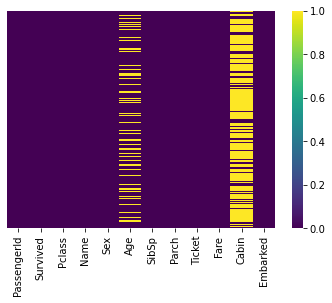

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = True , cmap = "viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

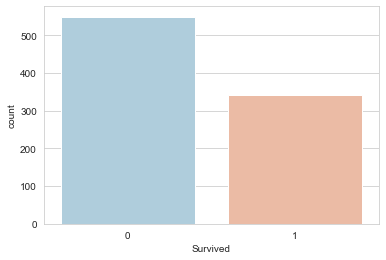

In [9]:
sns.set_style('whitegrid')

sns.countplot(x = "Survived", data = df ,palette = "RdBu_r" )

In [10]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

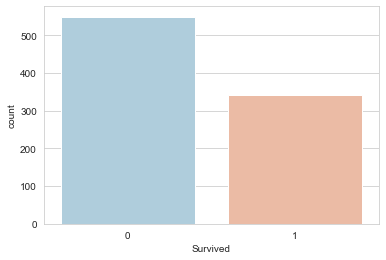

In [11]:
sns.countplot(x = "Survived", data = df ,palette = "RdBu_r" )

<AxesSubplot:xlabel='Survived', ylabel='count'>

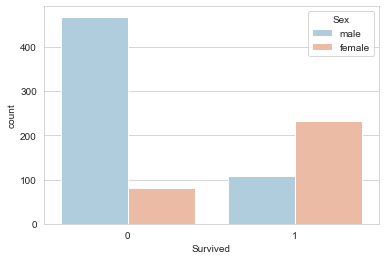

In [12]:
sns.countplot(x = "Survived",hue = "Sex", data = df ,palette = "RdBu_r" )

<AxesSubplot:xlabel='Survived', ylabel='count'>

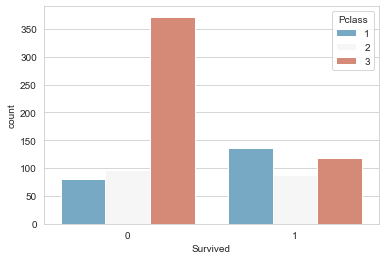

In [13]:
sns.countplot(x = "Survived",hue = "Pclass", data = df ,palette = "RdBu_r" )

C:\Users\AMIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

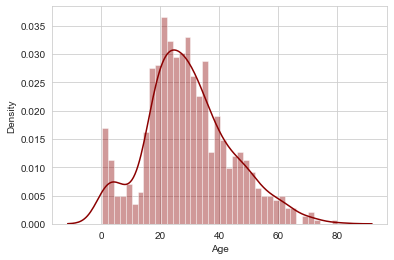

In [14]:
sns.distplot(df["Age"].dropna(),kde=True , color = "darkred",bins = 40)

<AxesSubplot:>

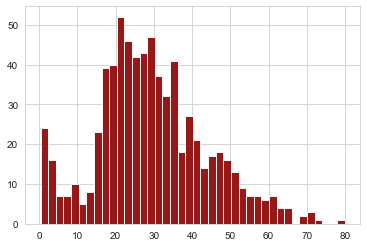

In [15]:
df["Age"].hist(bins = 40 , color = "darkred" , alpha= 0.9)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

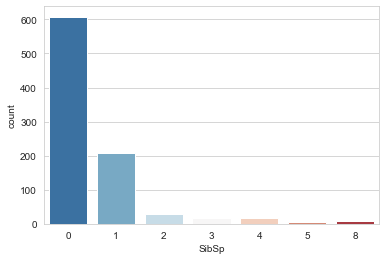

In [16]:
sns.countplot(x = "SibSp", data = df ,palette = "RdBu_r" )

<AxesSubplot:>

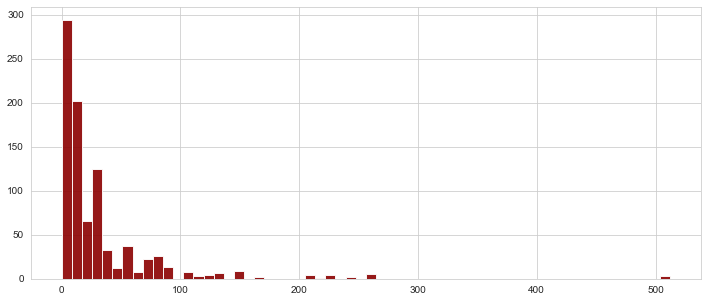

In [17]:
df["Fare"].hist(bins = 60 , color = "darkred" , alpha= 0.9,figsize=(12,5))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

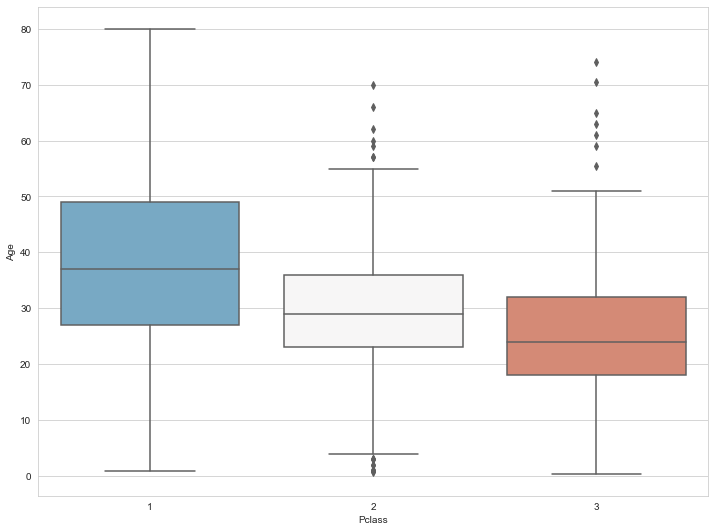

In [18]:
plt.figure(figsize=(12,9))
sns.boxplot(x = "Pclass", y = "Age" , data = df , palette = "RdBu_r")

In [19]:
def im_age (col) :
    age = col[0]
    pclass = col[1]
    
    if pd.isnull(age):
        
        if pclass == 1 :
            return 37
        
        elif pclass == 2 :
            return 27
        
        else:
            return 23
    else : 
        return age
    

In [20]:
df["age_new"] = df[["Age","Pclass"]].apply(im_age,axis=1)

<AxesSubplot:>

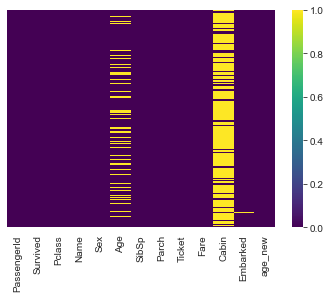

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = True , cmap = "viridis")

In [22]:
df[["Age","Pclass"]]

Age  Pclass
0    22.0       3
1    38.0       1
2    26.0       3
3    35.0       1
4    35.0       3
..    ...     ...
886  27.0       2
887  19.0       1
888   NaN       3
889  26.0       1
890  32.0       3

[891 rows x 2 columns]

In [23]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  age_new  
0      0         A/5 21171   7.2500   NaN        S     22.0  
1      0          PC 17599  71.2833   C85        C     38.0  
2      0  STON/O2. 3101282   7.9250   NaN        S     26.0  
3      0            113803  53.1000  C123        S     35.0  
4      0            373450   8.0500   NaN        S     35.0

In [24]:
df.drop("Cabin",axis = 1 ,inplace = True)

In [25]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  age_new  
0      0         A/5 21171   7.2500        S     22.0  
1      0          PC 17599  71.2833        C     38.0  
2      0  STON/O2. 3101282   7.9250        S     26.0  
3      0            113803  53.1000        S     35.0  
4      0            373450   8.0500        S     35.0

In [26]:
sex = pd.get_dummies(df["Sex"],drop_first = True)

In [27]:
sex

male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]

In [28]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
Embarked = pd.get_dummies(df["Embarked"],drop_first = True)

In [30]:
Embarked

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]

In [31]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  age_new  
0      0         A/5 21171   7.2500        S     22.0  
1      0          PC 17599  71.2833        C     38.0  
2      0  STON/O2. 3101282   7.9250        S     26.0  
3      0            113803  53.1000        S     35.0  
4      0            373450   8.0500        S     35.0

In [32]:
sd = pd.concat([sex,Embarked],axis = 1)

In [34]:
sd.head()

male  Q  S
0     1  0  1
1     0  0  0
2     0  0  1
3     0  0  1
4     1  0  1

In [35]:
df = pd.concat([df,sex,Embarked],axis = 1)

In [36]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  age_new  male  Q  S  
0      0         A/5 21171   7.2500        S     22.0     1  0  1  
1      0          PC 17599  71.2833        C     38.0     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     26.0     0  0  1  
3      0            113803  53.1000        S     35.0     0  0  1  
4      0            373450   8.0500        S     35.0     1  0  1

In [37]:
df.drop(["Name","Sex","Ticket","Embarked","age_new"],axis = 1 ,inplace = True)

In [38]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1